# MPO 762 - Problem Set 2

### Tiago Carrilho Bilo 
### C$\#$11950866

## (Question 1 solved by hand)

## 2 Fourier Analysis

#### (items 1 and 2 solved by hand) 

#### 3.

Lets continue solving the discretized advection equation 

$$
u_{t} + u_{x} = 0
$$

using a FDA scheme of the type (foward in time and backward in space):

$$
u^{n+1}_{j} = u^{n}_{j} - \mu (u^{n}_{j} - u^{n}_{j-1})
$$

where $\mu = \frac{\Delta t}{\Delta x}$ is the Courant number. 


The initial condition is given by a superposition if 3 waves (with wave numbers $k_{1}$, $k_{2}$ and $k_{3}$)

$$
u^{0}_{j} = cos(k_{1} x_{j}) + 0.2 cos(k_{2} x_{j}) + 0.1 cos(k_{3} x_{j})
$$

Therefore with we set $\mu = 0.5$, the solution for $u$ in $t(n=1)$ is given by

$$
u^{1}_{j} = 0.5 [cos(k_{1} x_{j}) + cos(k_{1} x_{j-1})] + 0.1 [cos(k_{2} x_{j}) + cos(k_{2} x_{j-1})] + 0.05 [cos(k_{3} x_{j}) + cos(k_{3} x_{j-1})]
$$


In [1]:
%%% Computing the initial conditions and the solution after the first time step

% Clear memory and close all figures
clear all 
close all 

% Seting the grid cells and edges (0<x<1)
M = 3200;                                          % # of grid cells
[x,xe,dx] = FDGrid(0,1,M);                         % x (grid cells), xe (cells edges), dx (grid spacing)

% Wavenumbers 
k1 = 2*pi; 
k2 = 2*pi*M/8;
k3 = 2*pi*M/2;

wave1 = inline('cos(k1*xe)');
wave2 = inline('0.2*cos(k2*xe)');
wave3 = inline('0.1*cos(k3*xe)');

% Initial condition 
wave1_n0 = wave1(k1,xe);
wave2_n0 = wave2(k2,xe);
wave3_n0 =  wave3(k3,xe);

u0 = wave1_n0 + wave2_n0 + wave3_n0;

% Solution at t(n = 1), considering periodic boundary condition 
u1 = zeros(1,M+1);
u1(2:end) = u0(2:end) - 0.5*(u0(2:end)-u0(1:end-1));
u1(1) = u0(1) - 0.5*(u0(1)-u0(end-2));

 added to session magics.



#### 4. 

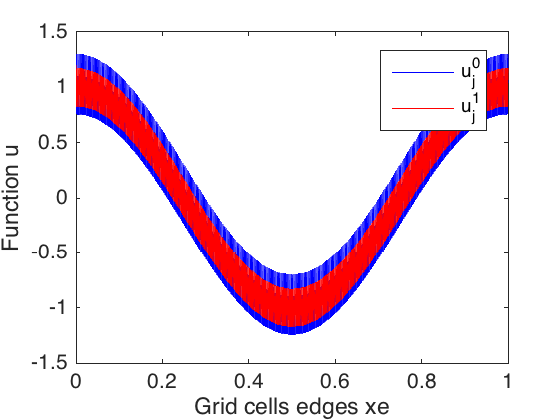

In [2]:
% Entire domain
plot(xe,u0,'b',xe,u1,'r')
xlabel('Grid cells edges xe')
ylabel('Function u')
legend('u^{0}_{j}','u^{1}_{j}')


Figure 1. Initial condition of u (blue line) and u in the time step t(n=1) (red line) in the entire domain.

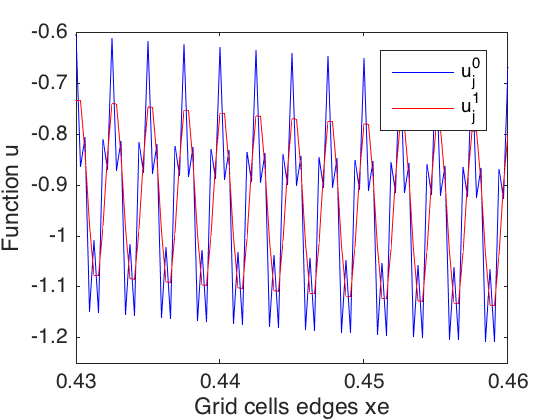

In [3]:
% Zoom in 
plot(xe,u0,'b',xe,u1,'r')
xlim([0.43,0.46])
ylim([-1.25,-0.6])

xlabel('Grid cells edges xe')
ylabel('Function u')
legend('u^{0}_{j}','u^{1}_{j}')

Figure 2. Initial condition of u (blue line) and u in the time step t(n=1) (red line) in an subset of the domain.

Figures 1 and 2 show the initial condition and the solution of u after the first time step. As we can verify, the signal traveled "eastward" (i. e., $c = 1 > 0$) and the solution amplitude decreased. At a first glance, it seems that the scheme has a problem of numerical diffusion. In fact we can also verify that the scheme is expected to be unconditionally stable with the amplitude deacresing every time step. 

Von-Newman stablity analysis: 

(1) Numerical scheme:

$$
u^{n+1}_{j} = u^{n}_{j} - \mu (u^{n}_{j} - u^{n}_{j-1})
$$


(2) Expanding the signal into a Fourier series: 

$$
\tilde{u}^{n+1} e^{ikx_{j}} = \tilde{u}^{n} e^{ikx_{j}} - 0.5 (\tilde{u}^{n} e^{ikx_{j}} - \tilde{u}^{n} e^{ikx_{j-1}})
$$

where $k$ is the wavenumber and $\tilde{u}$ is the amplitude of a wave. The expression above can be simplified as

$$A = \frac{\tilde{u}^{n+1}}{\tilde{u}^{n}} = 1 - 0.5 (1 - e^{-i k \Delta x})$$

where $A$ is called the amplification factor. Manipulating the expression above: 

$$A = 0.5 [1 + cons(k \Delta x) - i sin (k \Delta x)]$$

Therefore

$$|A|^{2} = A \times \bar{A}  =  0.5 + 0.5 \times cos(k \Delta x)$$

where $\bar{A}$ is the complex conjugate of $A$. Note that $|A|^{2} \le 1$ for all $k \Delta x$, therefore this scheme is unconditionally stable. However the signal will be preserverd (i. e., $|A|^{2} = 1$) if $k\Delta x = m \times 2\pi$, where m = [0, 1, 2, 3, 4, ...]. 




#### 5.  Taking the fft



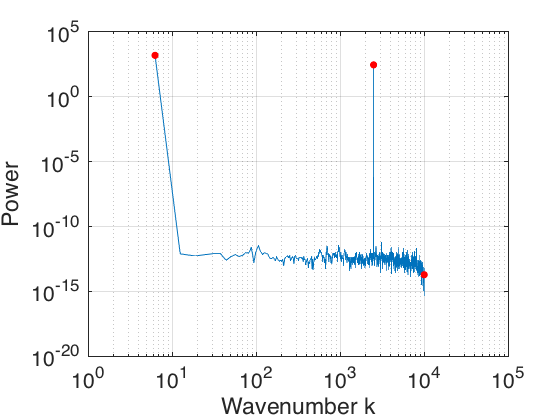

[Warning: Integer operands are required for colon operator when used as index] 
[> In pymat_eval (line 31)
  In matlabserver (line 24)]


In [4]:
% Taking the fft from the second value to the M+1 element due to the periodic boundary condition
fft_u1 = fft(u1(2:end));

% Power spectrum
p = abs(fft_u1);
p = fliplr(p((M+1)/2:end));

% Wavenumbers k
k=2*pi*[1:(M+1)/2];

pk1 = p(find(k == k1));
pk2 = p(find(k == k2));
pk3 = p(end); 

loglog(k,p)
hold on 

plot([k1 k2 k3],[pk1 pk2 pk3],'r.','markersize',20)

set(gca,...
    'XTick',[1 10 100 1000.0 10000.0 100000.0])
    
xlabel('Wavenumber k')
ylabel('Power')
grid on
hold off

Figure 3. Power spectrum of the $u^{1}_{j}$ as a function of wavenumber. The red dots represent k1, k2 and k3 in sequence. Note that the highest wavenumber has a very small power of the order $10^{-14}$, therefore can be considered zero.

#### 6. 

Since we are studying the advection equation, where the signal travels with velocity c

$$u_{t} + c u_{x} = 0$$

The distance that the signal must travel to complete a entire cycle in $n$ times steps is given by $M \times \Delta x$. 

Therefore 

$$c = \frac{M \times \Delta x}{n \times \Delta t}$$

From Courant number $\mu$ definition we get

$$\frac{M \times \Delta x}{n \times \Delta t} = \mu \frac{\Delta x}{\Delta t}$$

So 

$$n = \frac{M}{\mu}$$

#### 7. 

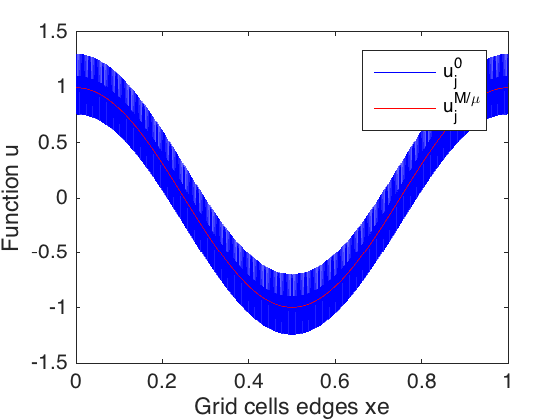

In [5]:
% Advection equation integration
for t = [1:2*M]
    if t == 1
        u_old = u0;
    else
        u_old = u_new;
    end

    u_new = zeros(1,M+1);
    u_new(2:end) = u_old(2:end) - 0.5*(u_old(2:end)-u_old(1:end-1));
    u_new(1) = u_old(1) - 0.5*(u_old(1)-u_old(end-2));
end

% Entire domain 
plot(xe,u0,'b',xe,u_new,'r')
xlabel('Grid cells edges xe')
ylabel('Function u')
legend('u^{0}_{j}','u^{M/\mu}_{j}')

Figure 4. Initial condition of u (blue line) and u in the time step t(n=M/$\mu$) (red line) in the entire domain.

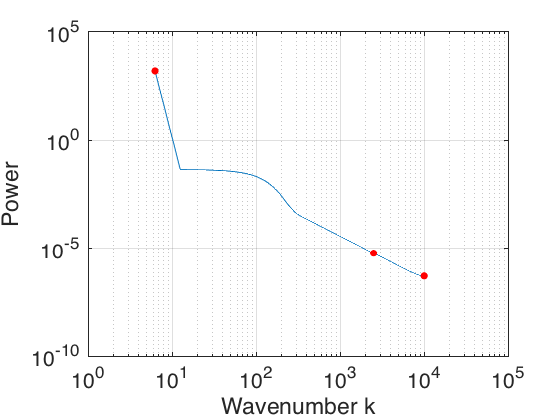

[Warning: Integer operands are required for colon operator when used as index] 
[> In pymat_eval (line 31)
  In matlabserver (line 24)]


In [6]:
% fft of the last time step 
% Taking the fft from the second value to the M+1 element due to the periodic boundary condition
fft_un = fft(u_new(2:end));

% Power spectrum
pn = abs(fft_un);
pn = fliplr(pn((M+1)/2:end));

% Wavenumbers k
k=2*pi*[1:(M+1)/2];

pnk1 = pn(find(k == k1));
pnk2 = pn(find(k == k2));
pnk3 = pn(end); 

loglog(k,pn)
hold on 

plot([k1 k2 k3],[pnk1 pnk2 pnk3],'r.','markersize',20)

set(gca,...
    'XTick',[1 10 100 1000.0 10000.0 100000.0])
    
xlabel('Wavenumber k')
ylabel('Power')
grid on
hold off



Figure 5. Power spectrum of the $u^{M/\mu}$ as a function of wavenumber. The red dots represent k1, k2 and k3 in sequence. 

As we can verify in Figures 4 and 5, wave 1 was the only wave that kept an amplitude comparable to the initial state.  

In fact from the $|A|^{2}$ results we have

$$
|A|^{2}_{k_{1}} = 0.5+0.5 \times cos(\frac{2\pi}{M}) \sim 1.00
$$


$$
|A|^{2}_{k_{2}} = 0.5 + 0.5 \times cos(\frac{\pi}{4}) \sim 0.85
$$


$$
|A|^{2}_{k_{3}} = 0.5+ 0.5 \times cos(\pi) = 0
$$


#### 8. Wave spectrum of the equation $u(x)$ from HW1


$$ u(x) = tanh\{\alpha[cos(\pi x) + \frac{1}{2}])\} + e^{-cos^{2}(\pi x)} $$



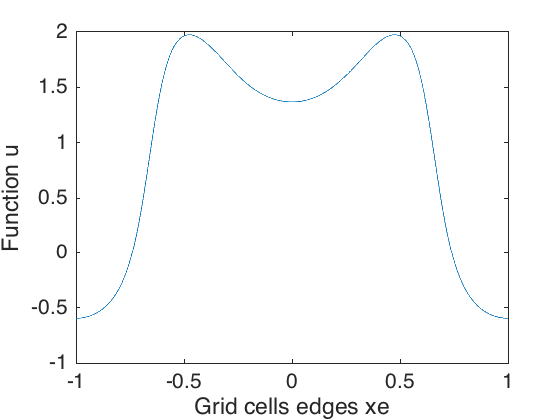

In [7]:
% HW1 function u(x)
[x,xe,dx] = FDGrid(-1,1,M);

a = 4.0; 
cosine = cos(pi.*xe);
sine = sin(pi.*xe);
expn = exp(-(cosine.^2.0));

u_hw1 = tanh(a.*(cosine + 0.5)) + expn; 


plot(xe,u_hw1)
xlabel('Grid cells edges xe')
ylabel('Function u')

Figure 6. Homework 1 function u(x)

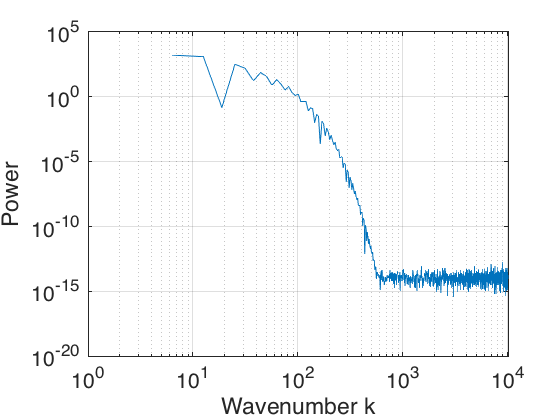

[Warning: Integer operands are required for colon operator when used as index] 
[> In pymat_eval (line 31)
  In matlabserver (line 24)]


In [8]:
% fft HW1
fft_hw1 = fft(u_hw1(2:end));

% Power spectrum
phw1 = abs(fft_hw1);
phw1 = fliplr(phw1((M+1)/2:end));

loglog(k,phw1)
set(gca,...
    'XTick',[1 10 100 1000.0 10000.0 100000.0])

xlabel('Wavenumber k')
ylabel('Power')
grid on

Figure 7. Wave Spectrum of the homework 1 function u(x).